In [2]:
from fitter import Fitter, get_common_distributions, get_distributions
import os
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor
import statsmodels
import statsmodels.api as sm
import seaborn as sns

In [3]:
def append_percentage(x, pos):
    del pos
    return str(int(x))+str('%')

def formatter(x, pos):
    del pos
    return str(int(x*100))+str('%')

In [4]:
# sns.set(
#     context="paper",
#     style="darkgrid",
#     palette="pastel",
#     rc={"figure.dpi": 150}
# )
sns.set_context("paper", font_scale=1.5)

In [5]:
def use_fitter(data):
    # Initialize the fitter object
    # f = Fitter(data, distributions='common')
    f = Fitter(data)

    # Fit common distributions
    f.fit(get_common_distributions())

    # Print the summary of the fitted distributions
    print(f.summary())

    print (f.get_best(method = 'sumsquare_error'))
    print (f.get_best(method = 'aic'))
    print (f.get_best(method = 'bic'))
    # print (f.get_best(method = 'kl_div'))
    print (f.get_best(method = 'ks_statistic'))
    print (f.get_best(method = 'ks_pvalue'))

In [6]:
def remove_outlier(data, contamination=0.1):
    lof = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
    yhat = lof.fit_predict(data)
    mask = yhat != -1
    return data[mask]

# MTTU vs MTTR

## Load MTTU

In [7]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "mttu"), "mttu.csv")
print (data_file)
df_tood = pd.read_csv(data_file,
                header=0,
                sep=',',
                on_bad_lines='skip',
                usecols=['system_name', 'from_package_name', 'total_duration', 'out_of_date_duration', 'ratio', 'avg_total_duration', 'avg_out_of_date_duration', 'avg_ratio'],
                )
# df.columns = ['system_name', 'package_name', 'total_requirement_duration', 'out_of_date_duration', 'ratio', 'dependents_approx']
rows = df_tood.shape[0]
print (df_tood.shape)
display(df_tood.head())

/home/nanin/Documents/ncstate/update-metrics/code/visualize-data/../../data/mttu/mttu.csv
(163207, 8)


,system_name,from_package_name,total_duration,out_of_date_duration,ratio,avg_total_duration,avg_out_of_date_duration,avg_ratio
0,CARGO,a10,397,0,0.000000,397.0,0.0,0.000000
1,CARGO,aarch64,481,325,0.675676,481.0,325.0,0.675676
2,CARGO,aardvark-dns,618,0,0.000000,618.0,0.0,0.000000
3,CARGO,ab-av1,582,100,0.171821,582.0,100.0,0.171821
4,CARGO,ab_glyph,3084,78,0.025292,1542.0,39.0,0.025292


In [8]:
df_tood = df_tood.dropna()

In [9]:
display(df_tood[['system_name', 'avg_out_of_date_duration', 'avg_ratio']].groupby(by=['system_name']).describe())

avg_out_of_date_duration                                           \
                               count        mean         std  min  25%    50%   
system_name                                                                     
CARGO                         3301.0  130.537013  265.329598  0.0  0.0   12.5   
NPM                         117129.0  344.657634  449.780841  0.0  0.5  174.0   
PYPI                         42777.0  147.425425  313.079576  0.0  0.0    0.0   

                                avg_ratio                                     \
                    75%     max     count      mean       std  min       25%   
system_name                                                                    
CARGO        129.000000  2596.0    3301.0  0.167245  0.248355  0.0  0.000000   
NPM          517.823529  4296.0  117129.0  0.284610  0.290818  0.0  0.000471   
PYPI         133.545455  3239.0   42777.0  0.136197  0.243295  0.0  0.000000   

                                      
                  50%       75%  max  
system_name                           
CARGO        0.021277  0.304218  1.0  
NPM          0.207750  0.485008  1.0  
PYPI         0.000000  0.162231  1.0

In [10]:
print(df_tood.groupby(by=['system_name'])['avg_out_of_date_duration'].describe().to_latex(columns=['count', 'mean', 'std', 'min', 'max'], float_format="%.0f", bold_rows=False, label="tab:statistics", caption="Statistics of the MTTU per system."))

\begin{table}
\caption{Statistics of the MTTU per system.}
\label{tab:statistics}
\begin{tabular}{lrrrrr}
\toprule
 & count & mean & std & min & max \\
system_name &  &  &  &  &  \\
\midrule
CARGO & 3301 & 131 & 265 & 0 & 2596 \\
NPM & 117129 & 345 & 450 & 0 & 4296 \\
PYPI & 42777 & 147 & 313 & 0 & 3239 \\
\bottomrule
\end{tabular}
\end{table}



In [11]:
print(df_tood.groupby(by=['system_name'])['avg_ratio'].describe().to_latex(columns=['count', 'mean', 'std', 'min', 'max'], float_format="%.4f", bold_rows=False, label="tab:statistics", caption="Statistics of the MTTU per system."))

\begin{table}
\caption{Statistics of the MTTU per system.}
\label{tab:statistics}
\begin{tabular}{lrrrrr}
\toprule
 & count & mean & std & min & max \\
system_name &  &  &  &  &  \\
\midrule
CARGO & 3301.0000 & 0.1672 & 0.2484 & 0.0000 & 1.0000 \\
NPM & 117129.0000 & 0.2846 & 0.2908 & 0.0000 & 1.0000 \\
PYPI & 42777.0000 & 0.1362 & 0.2433 & 0.0000 & 1.0000 \\
\bottomrule
\end{tabular}
\end{table}



## Load MTTR

In [12]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "mttr"), "mttr.csv")
print (data_file)
df_pfet = pd.read_csv(data_file,
                header=0,
                sep=',',
                on_bad_lines='skip',
                usecols=['system_name', 'from_package_name', 'total_duration', 'total_post_fix_exposure_time', 'ratio', 'avg_total_duration', 'avg_post_fix_exposure_time', 'avg_ratio'],
                )
# df.columns = ['system_name', 'package_name', 'total_requirement_duration', 'post_fix_exposure_time', 'ratio', 'dependents_approx']
rows = df_pfet.shape[0]
print (df_pfet.shape)
display(df_pfet.head())

/home/nanin/Documents/ncstate/update-metrics/code/visualize-data/../../data/mttr/mttr.csv
(22513, 8)


,system_name,from_package_name,total_duration,total_post_fix_exposure_time,ratio,avg_total_duration,avg_post_fix_exposure_time,avg_ratio
0,CARGO,ahrs,826,247,0.299031,826.0,247.0,0.299031
1,CARGO,alloc_geiger,1534,1516,0.988266,1534.0,1516.0,0.988266
2,CARGO,almel,1682,9,0.005351,1682.0,9.0,0.005351
3,CARGO,amp,1637,375,0.229078,1637.0,375.0,0.229078
4,CARGO,broot,1571,563,0.358370,1571.0,563.0,0.358370


In [13]:
df_pfet = df_pfet.dropna()

In [14]:
display(df_pfet[['system_name', 'avg_post_fix_exposure_time', 'avg_ratio']].groupby(by=['system_name']).describe())

avg_post_fix_exposure_time                                       \
                                 count        mean         std  min     25%   
system_name                                                                   
CARGO                             92.0  219.228261  305.965455  1.0   29.75   
NPM                            17263.0  415.817283  423.272107  1.0  111.00   
PYPI                            5158.0  281.235350  277.199696  1.0   82.00   

                                          avg_ratio                      \
                    50%       75%     max     count      mean       std   
system_name                                                               
CARGO         94.000000  313.7500  1516.0      92.0  0.211446  0.255399   
NPM          252.285714  614.0000  3395.0   17263.0  0.316707  0.284607   
PYPI         198.000000  397.1875  2733.0    5158.0  0.313956  0.278196   

                                                          
                  min       25%       50%       75%  max  
system_name                                               
CARGO        0.000826  0.030321  0.091390  0.285675  1.0  
NPM          0.000242  0.093107  0.217178  0.488505  1.0  
PYPI         0.000510  0.094787  0.227258  0.460691  1.0

In [15]:
print(df_pfet.groupby(by=['system_name'])['avg_post_fix_exposure_time'].describe().to_latex(columns=['count', 'mean', 'std', 'min', 'max'], float_format="%.0f", bold_rows=False, label="tab:statistics", caption="Statistics of the MTTR per system."))

\begin{table}
\caption{Statistics of the MTTR per system.}
\label{tab:statistics}
\begin{tabular}{lrrrrr}
\toprule
 & count & mean & std & min & max \\
system_name &  &  &  &  &  \\
\midrule
CARGO & 92 & 219 & 306 & 1 & 1516 \\
NPM & 17263 & 416 & 423 & 1 & 3395 \\
PYPI & 5158 & 281 & 277 & 1 & 2733 \\
\bottomrule
\end{tabular}
\end{table}



# Keep packages having both MTTU & MTTR

In [16]:
s2 = pd.merge(df_tood, df_pfet, how='inner', on=['system_name', 'from_package_name'], suffixes=('_mttu', '_mttr')).drop(columns=['out_of_date_duration', 'total_duration_mttu', 'ratio_mttu', 'avg_total_duration_mttu', 'total_duration_mttr', 'total_post_fix_exposure_time', 'ratio_mttr', 'avg_total_duration_mttr'])  

In [17]:
s2.columns

Index(['system_name', 'from_package_name', 'avg_out_of_date_duration',
       'avg_ratio_mttu', 'avg_post_fix_exposure_time', 'avg_ratio_mttr'],
      dtype='object')

In [18]:
#s2.drop(s2[s2.avg_out_of_date_duration > s2.avg_post_fix_exposure_time].index, inplace=True)

In [19]:
s1 = pd.merge(df_tood, df_pfet, how='left', on=['system_name', 'from_package_name'], suffixes=('_mttu', '_mttr')).drop(columns=['out_of_date_duration', 'total_duration_mttu', 'ratio_mttu', 'avg_total_duration_mttu', 'total_duration_mttr', 'total_post_fix_exposure_time', 'ratio_mttr', 'avg_total_duration_mttr'])  

In [20]:
s1.columns

Index(['system_name', 'from_package_name', 'avg_out_of_date_duration',
       'avg_ratio_mttu', 'avg_post_fix_exposure_time', 'avg_ratio_mttr'],
      dtype='object')

In [21]:
s1

,system_name,from_package_name,avg_out_of_date_duration,avg_ratio_mttu,avg_post_fix_exposure_time,avg_ratio_mttr
0,CARGO,a10,0.000000,0.000000,NaN,NaN
1,CARGO,aarch64,325.000000,0.675676,NaN,NaN
2,CARGO,aardvark-dns,0.000000,0.000000,NaN,NaN
3,CARGO,ab-av1,100.000000,0.171821,NaN,NaN
4,CARGO,ab_glyph,39.000000,0.025292,NaN,NaN
...,...,...,...,...,...,...
163202,PYPI,zygoat-django,241.166667,0.169995,NaN,NaN
163203,PYPI,zyte-api,0.000000,0.000000,NaN,NaN
163204,PYPI,zython,0.000000,0.000000,NaN,NaN
163205,PYPI,zytlib,0.000000,0.000000,NaN,NaN


In [22]:
s1.loc[s1.avg_out_of_date_duration == 0.0, 'avg_post_fix_exposure_time'] = 0.0
s1.loc[s1.avg_ratio_mttu == 0.0, 'avg_ratio_mttr'] = 0.0

In [23]:
s1.dropna(inplace=True)
s1

,system_name,from_package_name,avg_out_of_date_duration,avg_ratio_mttu,avg_post_fix_exposure_time,avg_ratio_mttr
0,CARGO,a10,0.0,0.0,0.0,0.0
2,CARGO,aardvark-dns,0.0,0.0,0.0,0.0
6,CARGO,abstract_integers,0.0,0.0,0.0,0.0
7,CARGO,activitypub_federation,0.0,0.0,0.0,0.0
8,CARGO,actix,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
163198,PYPI,zxing-cpp,0.0,0.0,0.0,0.0
163200,PYPI,zyf,0.0,0.0,0.0,0.0
163203,PYPI,zyte-api,0.0,0.0,0.0,0.0
163204,PYPI,zython,0.0,0.0,0.0,0.0


In [24]:
# Not doing actually
# s1.drop(s1[s1.avg_out_of_date_duration > s1.avg_post_fix_exposure_time].index)
s1[s1.avg_out_of_date_duration < s1.avg_post_fix_exposure_time]

,system_name,from_package_name,avg_out_of_date_duration,avg_ratio_mttu,avg_post_fix_exposure_time,avg_ratio_mttr
89,CARGO,alloc_geiger,811.000000,0.893664,1516.0,0.988266
1080,CARGO,em-app,749.500000,0.687615,1128.0,0.752502
1172,CARGO,fdt-rs,565.000000,0.371283,1238.0,0.805990
1318,CARGO,gfold,22.000000,0.136476,26.0,0.046181
1380,CARGO,gpgme,32.000000,0.077922,96.0,0.603774
...,...,...,...,...,...,...
162953,PYPI,zero-play,138.000000,0.157406,966.0,0.674581
162972,PYPI,zfit,89.482759,0.083548,137.0,0.130352
163004,PYPI,zimscraperlib,214.250000,0.267061,255.0,0.169042
163018,PYPI,zlmdb,78.500000,0.040726,628.0,0.322051


In [25]:
packages = pd.merge(s1, s2, how='inner', on=['system_name', 'from_package_name'])
packages

,system_name,from_package_name,avg_out_of_date_duration_x,avg_ratio_mttu_x,avg_post_fix_exposure_time_x,avg_ratio_mttr_x,avg_out_of_date_duration_y,avg_ratio_mttu_y,avg_post_fix_exposure_time_y,avg_ratio_mttr_y
0,CARGO,ahrs,623.333333,0.518868,247.000000,0.299031,623.333333,0.518868,247.000000,0.299031
1,CARGO,alloc_geiger,811.000000,0.893664,1516.000000,0.988266,811.000000,0.893664,1516.000000,0.988266
2,CARGO,almel,1237.000000,0.735434,9.000000,0.005351,1237.000000,0.735434,9.000000,0.005351
3,CARGO,amp,1495.000000,0.913256,375.000000,0.229078,1495.000000,0.913256,375.000000,0.229078
4,CARGO,broot,1031.000000,0.656270,563.000000,0.358370,1031.000000,0.656270,563.000000,0.358370
...,...,...,...,...,...,...,...,...,...,...
22508,PYPI,zqpy,483.350000,0.441698,454.250000,0.397419,483.350000,0.441698,454.250000,0.397419
22509,PYPI,zsl,645.142857,0.579123,348.000000,0.292806,645.142857,0.579123,348.000000,0.292806
22510,PYPI,zucchini,1982.166667,0.896367,709.333333,0.298583,1982.166667,0.896367,709.333333,0.298583
22511,PYPI,zuul,144.061224,0.103920,20.000000,0.011628,144.061224,0.103920,20.000000,0.011628


# Common package in all three ecosystems

In [26]:
df_common = s2.from_package_name.value_counts().to_frame()
df_common = df_common[df_common['count'] > 1]
df_common

,count
from_package_name,
botbuilder-ai,2
docusign-admin,2
appdynamics-lambda-tracer,2
clink,2
kkiapay,2
ccf,2
twilio,2
roboflow,2
docusign-click,2


No package with our maintained criteria that is in all 3 ecosystems.

## Generate QQ plot

In [27]:
df_tood[df_tood.system_name == 'NPM']['out_of_date_duration']

3301        195
3302        988
3303       6957
3304          0
3305       2723
          ...  
120425    11060
120426     1269
120427     4425
120428       99
120429        2
Name: out_of_date_duration, Length: 117129, dtype: int64

(92, 1)
(92, 1)
(82, 1)
(84, 1)
KstestResult(statistic=0.5423925667828107, pvalue=9.483831936937323e-12, statistic_location=185.0, statistic_sign=-1)


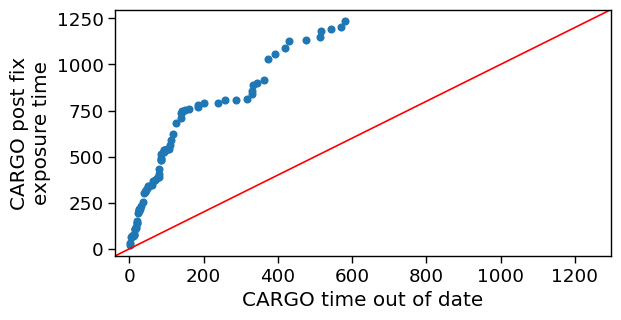

In [28]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

system_name = 'CARGO'

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu_vs_mttr"),
                         "mttu_vs_mttr_cargo.pdf")

df_tood_cargo = pd.DataFrame(s2[s2.system_name == system_name]['avg_out_of_date_duration'].sort_values())
df_pfet_cargo = pd.DataFrame(s2[s2.system_name == system_name]['avg_post_fix_exposure_time'].sort_values())

print(df_tood_cargo.shape)
print(df_pfet_cargo.shape)

df_tood_cargo = remove_outlier(df_tood_cargo)
df_pfet_cargo = remove_outlier(df_pfet_cargo)

print(df_tood_cargo.shape)
print(df_pfet_cargo.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_cargo.to_numpy()),
                      np.ndarray.flatten(df_pfet_cargo.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_cargo)
pp2 = sm.ProbPlot(df_pfet_cargo)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 3500])
# h.axes[0].set_ylim([0, 3500])

# Display the plot
plt.xlabel('CARGO time out of date')
plt.ylabel('CARGO post fix\nexposure time')
# plt.show()
plt.savefig(data_file, bbox_inches='tight')

(17263, 1)
(17263, 1)
(15536, 1)
(15538, 1)
KstestResult(statistic=0.32319128188969365, pvalue=0.0, statistic_location=196.5, statistic_sign=-1)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


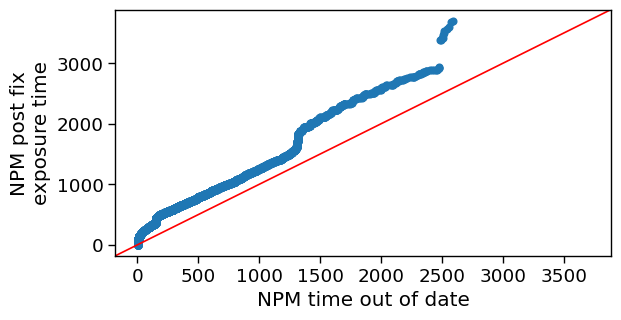

In [29]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

system_name = 'NPM'

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu_vs_mttr"), "mttu_vs_mttr_npm.pdf")

df_tood_npm = pd.DataFrame(s2[s2.system_name == system_name]['avg_out_of_date_duration'].sort_values())
df_pfet_npm = pd.DataFrame(s2[s2.system_name == system_name]['avg_post_fix_exposure_time'].sort_values())

print(df_tood_npm.shape)
print(df_pfet_npm.shape)

df_tood_npm = remove_outlier(df_tood_npm)
df_pfet_npm = remove_outlier(df_pfet_npm)

print(df_tood_npm.shape)
print(df_pfet_npm.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_npm.to_numpy()),
                      np.ndarray.flatten(df_pfet_npm.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_npm)
pp2 = sm.ProbPlot(df_pfet_npm)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 4500])
# h.axes[0].set_ylim([0, 4500])

# Display the plot
plt.xlabel('NPM time out of date')
plt.ylabel('NPM post fix\nexposure time')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

(5158, 1)
(5158, 1)
(5158, 1)
(5158, 1)
KstestResult(statistic=0.1019775106630477, pvalue=9.27094619400728e-24, statistic_location=454.6, statistic_sign=-1)


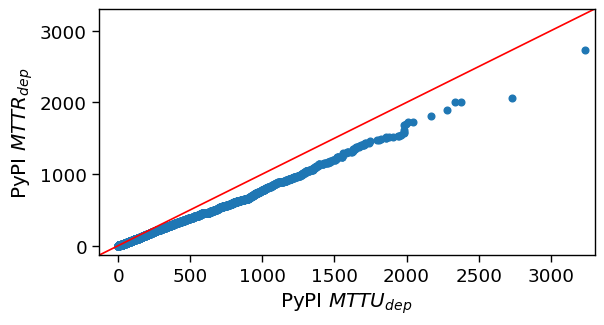

In [30]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

system_name = 'PYPI'

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu_vs_mttr"), "mttu_vs_mttr_pypi.pdf")

df_tood_pypi = pd.DataFrame(s2[s2.system_name == system_name]['avg_out_of_date_duration'].sort_values())
df_pfet_pypi = pd.DataFrame(s2[s2.system_name == system_name]['avg_post_fix_exposure_time'].sort_values())

print(df_tood_pypi.shape)
print(df_pfet_pypi.shape)

# df_tood_pypi = remove_outlier(df_tood_pypi)
# df_pfet_pypi = remove_outlier(df_pfet_pypi)

print(df_tood_pypi.shape)
print(df_pfet_pypi.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_pypi.to_numpy()),
                      np.ndarray.flatten(df_pfet_pypi.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_pypi)
pp2 = sm.ProbPlot(df_pfet_pypi)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 3500])
# h.axes[0].set_ylim([0, 3500])

# Display the plot
plt.xlabel('PyPI ${MTTU}_{dep}$')
plt.ylabel('PyPI ${MTTR}_{dep}$')
# plt.show()
plt.savefig(data_file, bbox_inches='tight')

(22513, 1)
(22513, 1)
(20261, 1)
(20263, 1)
KstestResult(statistic=0.25739301250107893, pvalue=0.0, statistic_location=222.0, statistic_sign=-1)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


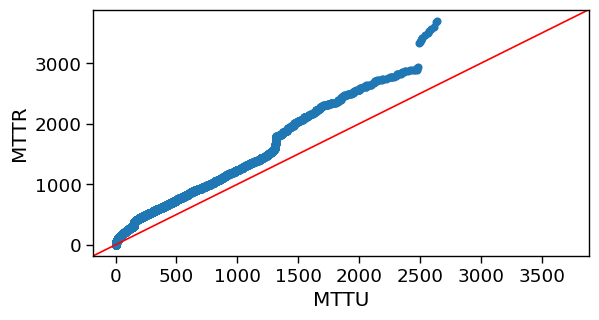

In [31]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu_vs_mttr"), "mttu_vs_mttr.pdf")

df_tood_ = pd.DataFrame(s2['avg_out_of_date_duration'].sort_values())
df_pfet_ = pd.DataFrame(s2['avg_post_fix_exposure_time'].sort_values())

print(df_tood_.shape)
print(df_pfet_.shape)

df_tood_ = remove_outlier(df_tood_)
df_pfet_ = remove_outlier(df_pfet_)

print(df_tood_.shape)
print(df_pfet_.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                      np.ndarray.flatten(df_pfet_.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_)
pp2 = sm.ProbPlot(df_pfet_)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 4500])
# h.axes[0].set_ylim([0, 4500])

# Display the plot
plt.xlabel('MTTU')
plt.ylabel('MTTR')
# plt.show()
plt.savefig(data_file, bbox_inches='tight')

(22513, 1)
(22513, 1)
(22513, 1)
(22513, 1)
KstestResult(statistic=0.2650024430329143, pvalue=0.0, statistic_location=222.0, statistic_sign=-1)


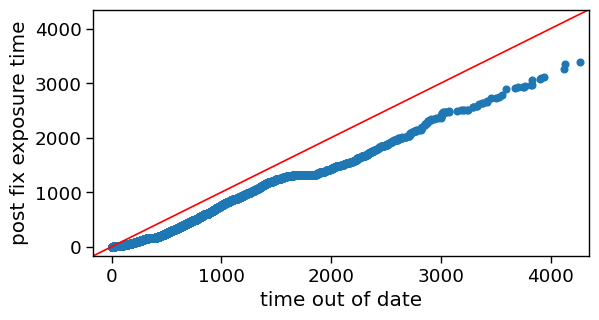

In [32]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-1000-paper.png")

df_tood_ = pd.DataFrame(s2['avg_out_of_date_duration'].sort_values())
df_pfet_ = pd.DataFrame(s2['avg_post_fix_exposure_time'].sort_values())

print(df_tood_.shape)
print(df_pfet_.shape)

# df_tood_ = remove_outlier(df_tood_)
# df_pfet_ = remove_outlier(df_pfet_)

print(df_tood_.shape)
print(df_pfet_.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                      np.ndarray.flatten(df_pfet_.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_)
pp2 = sm.ProbPlot(df_pfet_)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 1000])
# h.axes[0].set_ylim([0, 1000])

# Display the plot
plt.xlabel('time out of date')
plt.ylabel('post fix exposure time')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

(17711, 1)
(17711, 1)
(15940, 1)
(15945, 1)
KstestResult(statistic=0.28752605116474333, pvalue=0.0, statistic_location=222.0, statistic_sign=-1)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


Text(0, 0.5, 'post fix exposure time')

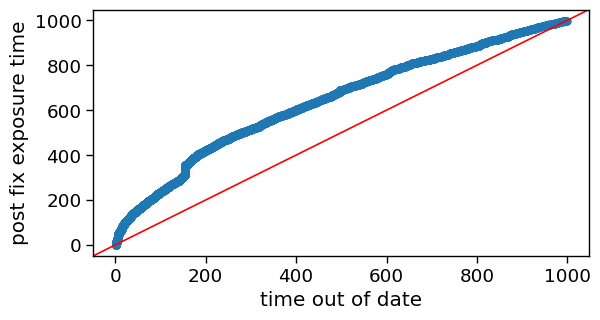

In [33]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

#data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet.png")

df_tood_ = pd.DataFrame(s2[(s2['avg_post_fix_exposure_time'] < 1000) & (s2['avg_out_of_date_duration'] < 1000)]['avg_out_of_date_duration'].sort_values())
df_pfet_ = pd.DataFrame(s2[(s2['avg_post_fix_exposure_time'] < 1000) & (s2['avg_out_of_date_duration'] < 1000)]['avg_post_fix_exposure_time'].sort_values())

print(df_tood_.shape)
print(df_pfet_.shape)

df_tood_ = remove_outlier(df_tood_)
df_pfet_ = remove_outlier(df_pfet_)

print(df_tood_.shape)
print(df_pfet_.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                      np.ndarray.flatten(df_pfet_.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_)
pp2 = sm.ProbPlot(df_pfet_)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 4500])
# h.axes[0].set_ylim([0, 4500])

# Display the plot
plt.xlabel('time out of date')
plt.ylabel('post fix exposure time')
# plt.show()
# plt.savefig(data_file, dpi=300, bbox_inches='tight')

(92, 1)
(92, 1)
(82, 1)
(82, 1)
KstestResult(statistic=0.6585365853658537, pvalue=4.0511177041140123e-17, statistic_location=0.2724853645556146, statistic_sign=-1)


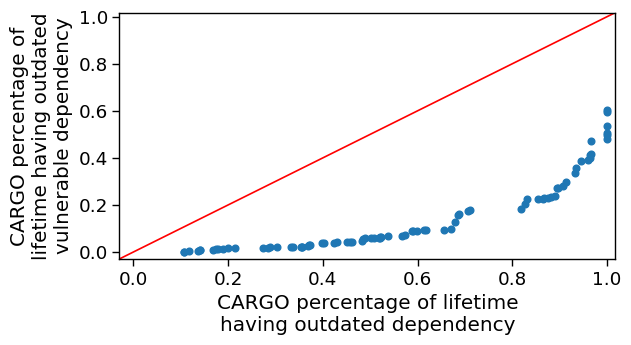

In [34]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

system_name = 'CARGO'

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-cargo-ratio.png")

df_tood_cargo_ratio = pd.DataFrame(s2[s2.system_name == system_name]['avg_ratio_mttu'].sort_values())
df_pfet_cargo_ratio = pd.DataFrame(s2[s2.system_name == system_name]['avg_ratio_mttr'].sort_values())

print(df_tood_cargo_ratio.shape)
print(df_pfet_cargo_ratio.shape)

df_tood_cargo_ratio = remove_outlier(df_tood_cargo_ratio)
df_pfet_cargo_ratio = remove_outlier(df_pfet_cargo_ratio)

print(df_tood_cargo_ratio.shape)
print(df_pfet_cargo_ratio.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_cargo_ratio.to_numpy()),
                      np.ndarray.flatten(df_pfet_cargo_ratio.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_cargo_ratio)
pp2 = sm.ProbPlot(df_pfet_cargo_ratio)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 3500])
# h.axes[0].set_ylim([0, 3500])

# Display the plot
plt.xlabel('CARGO percentage of lifetime\nhaving outdated dependency')
plt.ylabel('CARGO percentage of\nlifetime having outdated\nvulnerable dependency')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

(17263, 1)
(17263, 1)
(15536, 1)
(15536, 1)
KstestResult(statistic=0.4027420185375902, pvalue=0.0, statistic_location=0.2553500181356546, statistic_sign=-1)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


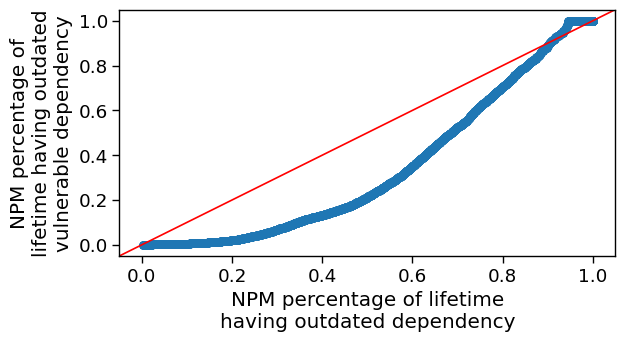

In [35]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

system_name = 'NPM'

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-npm-ratio.png")

df_tood_npm_ratio = pd.DataFrame(s2[s2.system_name == system_name]['avg_ratio_mttu'].sort_values())
df_pfet_npm_ratio = pd.DataFrame(s2[s2.system_name == system_name]['avg_ratio_mttr'].sort_values())

print(df_tood_npm_ratio.shape)
print(df_pfet_npm_ratio.shape)

df_tood_npm_ratio = remove_outlier(df_tood_npm_ratio)
df_pfet_npm_ratio = remove_outlier(df_pfet_npm_ratio)

print(df_tood_npm_ratio.shape)
print(df_pfet_npm_ratio.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_npm_ratio.to_numpy()),
                      np.ndarray.flatten(df_pfet_npm_ratio.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_npm_ratio)
pp2 = sm.ProbPlot(df_pfet_npm_ratio)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 3500])
# h.axes[0].set_ylim([0, 3500])

# Display the plot
plt.xlabel('NPM percentage of lifetime\nhaving outdated dependency')
plt.ylabel('NPM percentage of\nlifetime having outdated\nvulnerable dependency')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

(5158, 1)
(5158, 1)
(4642, 1)
(4642, 1)
KstestResult(statistic=0.13377854373115036, pvalue=1.3088820609855737e-36, statistic_location=0.2482739185571368, statistic_sign=-1)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


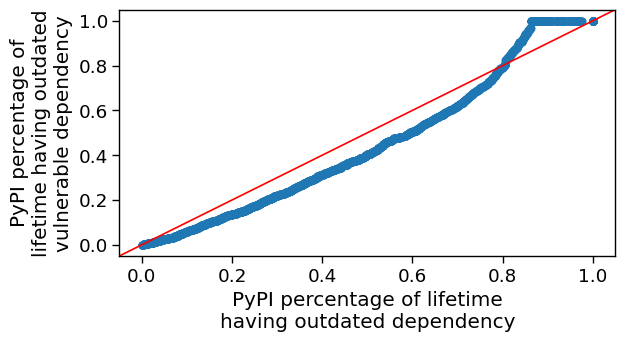

In [36]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

system_name = 'PYPI'

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-pypi-ratio.png")

df_tood_pypi_ratio = pd.DataFrame(s2[s2.system_name == system_name]['avg_ratio_mttu'].sort_values())
df_pfet_pypi_ratio = pd.DataFrame(s2[s2.system_name == system_name]['avg_ratio_mttr'].sort_values())

print(df_tood_pypi_ratio.shape)
print(df_pfet_pypi_ratio.shape)

df_tood_pypi_ratio = remove_outlier(df_tood_pypi_ratio)
df_pfet_pypi_ratio = remove_outlier(df_pfet_pypi_ratio)

print(df_tood_pypi_ratio.shape)
print(df_pfet_pypi_ratio.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_pypi_ratio.to_numpy()),
                      np.ndarray.flatten(df_pfet_pypi_ratio.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_pypi_ratio)
pp2 = sm.ProbPlot(df_pfet_pypi_ratio)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 3500])
# h.axes[0].set_ylim([0, 3500])

# Display the plot
plt.xlabel('PyPI percentage of lifetime\nhaving outdated dependency')
plt.ylabel('PyPI percentage of\nlifetime having outdated\nvulnerable dependency')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2801/2758518913.py:31: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('${MTTU}_{dep}^{\prime}$')
/tmp/ipykernel_2801/2758518913.py:32: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('${MTTR}_{dep}^{\prime}$')


(22513, 1)
(22513, 1)
(22513, 1)
(22513, 1)
KstestResult(statistic=0.3357171412073025, pvalue=0.0, statistic_location=0.256150506512301, statistic_sign=-1)


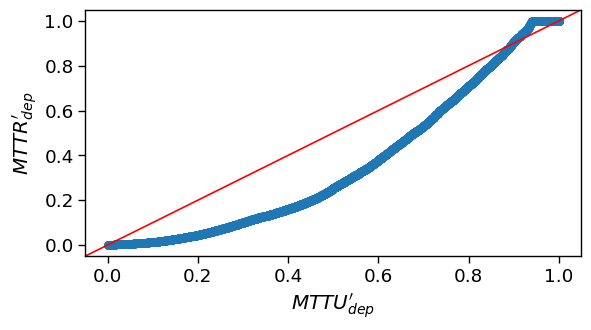

In [37]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu_vs_mttr"), "mttu_vs_mttr_ratio.pdf")

df_tood_ratio = pd.DataFrame(s2['avg_ratio_mttu'].sort_values())
df_pfet_ratio = pd.DataFrame(s2['avg_ratio_mttr'].sort_values())

print(df_tood_ratio.shape)
print(df_pfet_ratio.shape)

# df_tood_ratio = remove_outlier(df_tood_ratio)
# df_pfet_ratio = remove_outlier(df_pfet_ratio)

print(df_tood_ratio.shape)
print(df_pfet_ratio.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_ratio.to_numpy()),
                      np.ndarray.flatten(df_pfet_ratio.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_ratio)
pp2 = sm.ProbPlot(df_pfet_ratio)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 3500])
# h.axes[0].set_ylim([0, 3500])

# Display the plot
plt.xlabel('${MTTU}_{dep}^{\prime}$')
plt.ylabel('${MTTR}_{dep}^{\prime}$')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

(22513, 1)
(22513, 1)
(20261, 1)
(20261, 1)
KstestResult(statistic=0.3349785301811362, pvalue=0.0, statistic_location=0.2666051660516605, statistic_sign=-1)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


Text(0, 0.5, 'percentage of\nlifetime having outdated\nvulnerable dependency')

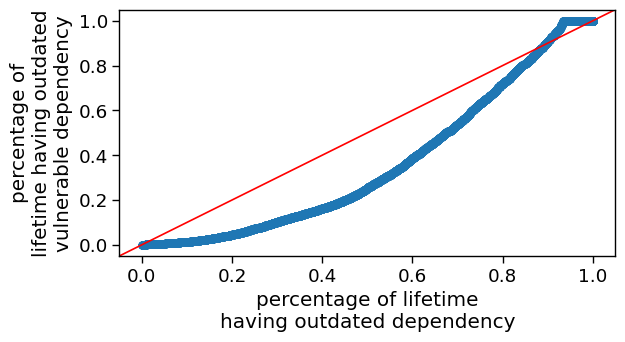

In [38]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-ratio.png")

df_tood_ratio = pd.DataFrame(s2['avg_ratio_mttu'].sort_values())
df_pfet_ratio = pd.DataFrame(s2['avg_ratio_mttr'].sort_values())

print(df_tood_ratio.shape)
print(df_pfet_ratio.shape)

df_tood_ratio = remove_outlier(df_tood_ratio)
df_pfet_ratio = remove_outlier(df_pfet_ratio)

print(df_tood_ratio.shape)
print(df_pfet_ratio.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_ratio.to_numpy()),
                      np.ndarray.flatten(df_pfet_ratio.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_ratio)
pp2 = sm.ProbPlot(df_pfet_ratio)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 3500])
# h.axes[0].set_ylim([0, 3500])

# Display the plot
plt.xlabel('percentage of lifetime\nhaving outdated dependency')
plt.ylabel('percentage of\nlifetime having outdated\nvulnerable dependency')
# plt.show()
#plt.savefig(data_file, dpi=300, bbox_inches='tight')

(17711, 1)
(17711, 1)


(15940, 1)
(15940, 1)
KstestResult(statistic=0.3409661229611041, pvalue=0.0, statistic_location=0.2243867243867243, statistic_sign=-1)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


Text(0, 0.5, 'percentage of\nlifetime having outdated\nvulnerable dependency')

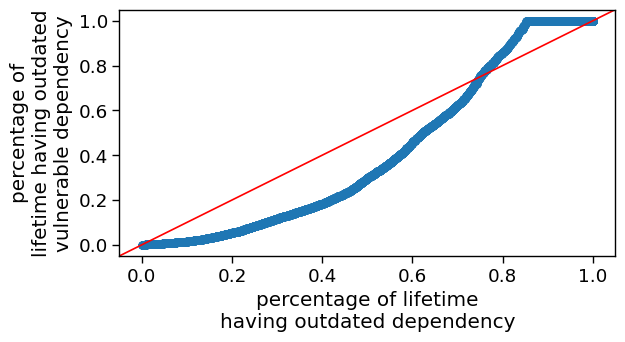

In [39]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

# data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-ratio.png")

df_tood_ratio = pd.DataFrame(s2[(s2['avg_post_fix_exposure_time'] < 1000) & (s2['avg_out_of_date_duration'] < 1000)]['avg_ratio_mttu'].sort_values())
df_pfet_ratio = pd.DataFrame(s2[(s2['avg_post_fix_exposure_time'] < 1000) & (s2['avg_out_of_date_duration'] < 1000)]['avg_ratio_mttr'].sort_values())

print(df_tood_ratio.shape)
print(df_pfet_ratio.shape)

df_tood_ratio = remove_outlier(df_tood_ratio)
df_pfet_ratio = remove_outlier(df_pfet_ratio)

print(df_tood_ratio.shape)
print(df_pfet_ratio.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_ratio.to_numpy()),
                      np.ndarray.flatten(df_pfet_ratio.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_ratio)
pp2 = sm.ProbPlot(df_pfet_ratio)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 3500])
# h.axes[0].set_ylim([0, 3500])

# Display the plot
plt.xlabel('percentage of lifetime\nhaving outdated dependency')
plt.ylabel('percentage of\nlifetime having outdated\nvulnerable dependency')
# plt.show()
# plt.savefig(data_file, dpi=300, bbox_inches='tight')

# Statistical tests

In [40]:
df_tood_ratio = s2['avg_ratio_mttu'].dropna().to_numpy()
df_pfet_ratio = s2['avg_ratio_mttr'].dropna().to_numpy()
df_tood_ = s2['avg_out_of_date_duration'].dropna().to_numpy()
df_pfet_ = s2['avg_post_fix_exposure_time'].dropna().to_numpy()
print (df_tood_ratio.shape)
print (df_pfet_ratio.shape)

print(stats.ks_2samp(df_tood_ratio, df_pfet_ratio))
print(stats.ks_2samp(df_tood_, df_pfet_))
print(stats.mannwhitneyu(df_tood_ratio, df_pfet_ratio))
print(stats.mannwhitneyu(df_tood_, df_pfet_))

(22513,)
(22513,)
KstestResult(statistic=0.3357171412073025, pvalue=0.0, statistic_location=0.256150506512301, statistic_sign=-1)
KstestResult(statistic=0.2650024430329143, pvalue=0.0, statistic_location=222.0, statistic_sign=-1)
MannwhitneyuResult(statistic=350799687.0, pvalue=0.0)
MannwhitneyuResult(statistic=335330152.0, pvalue=0.0)


In [41]:
df_tood_ratio = s2[(s2['avg_post_fix_exposure_time'] < 1000) & (s2['avg_out_of_date_duration'] < 1000)]['avg_ratio_mttu'].dropna().to_numpy()
df_pfet_ratio = s2[(s2['avg_post_fix_exposure_time'] < 1000) & (s2['avg_out_of_date_duration'] < 1000)]['avg_ratio_mttr'].dropna().to_numpy()
df_tood_ = s2[(s2['avg_post_fix_exposure_time'] < 1000) & (s2['avg_out_of_date_duration'] < 1000)]['avg_out_of_date_duration'].dropna().to_numpy()
df_pfet_ = s2[(s2['avg_post_fix_exposure_time'] < 1000) & (s2['avg_out_of_date_duration'] < 1000)]['avg_post_fix_exposure_time'].dropna().to_numpy()
print (df_tood_ratio.shape)
print (df_pfet_ratio.shape)

print(stats.ks_2samp(df_tood_ratio, df_pfet_ratio))
print(stats.ks_2samp(df_tood_, df_pfet_))
print(stats.mannwhitneyu(df_tood_ratio, df_pfet_ratio))
print(stats.mannwhitneyu(df_tood_, df_pfet_))

(17711,)
(17711,)
KstestResult(statistic=0.34611258539890466, pvalue=0.0, statistic_location=0.2258180510607695, statistic_sign=-1)
KstestResult(statistic=0.2960871774603354, pvalue=0.0, statistic_location=193.0, statistic_sign=-1)
MannwhitneyuResult(statistic=218387258.0, pvalue=0.0)
MannwhitneyuResult(statistic=213629648.5, pvalue=0.0)


In [42]:
# Extract the data
avg_out_of_date_duration = s2['avg_out_of_date_duration'].dropna().to_numpy()
avg_post_fix_exposure_time = s2['avg_post_fix_exposure_time'].dropna().to_numpy()

# # Unpaired two-sample t-test
# _, p_greater = stats.ttest_ind(avg_out_of_date_duration + bound, avg_post_fix_exposure_time, alternative='greater')
# _, p_less = stats.ttest_ind(avg_out_of_date_duration - bound, avg_post_fix_exposure_time, alternative='less')
# # Choose the maximum p-value
# pval = max(p_less, p_greater)

# print(f"P-value: {pval}")

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(avg_out_of_date_duration, avg_post_fix_exposure_time)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 51.024908708072
P-value: 0.0


## Analysis with < 2000 days

### TOOD and PFET

(22115, 1)
(22419, 1)
(19903, 1)
(20188, 1)
KstestResult(statistic=0.25566839721490126, pvalue=0.0, statistic_location=222.0, statistic_sign=-1)
Epps_Singleton_2sampResult(statistic=3562.13249642311, pvalue=0.0)
Anderson_ksampResult(statistic=1902.7234302723946, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=0.001)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/tmp/ipykernel_2801/103540219.py:23: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  print (stats.anderson_ksamp([np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy())]))


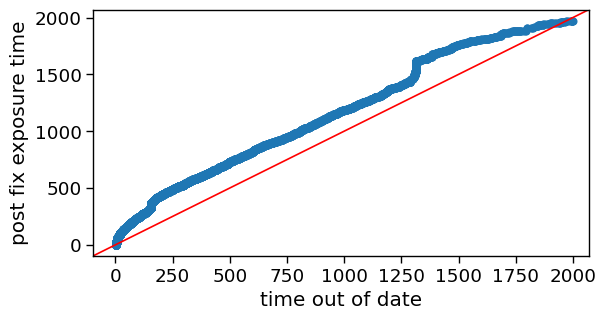

In [43]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-2000.png")

df_tood_ = pd.DataFrame(s2[s2.avg_out_of_date_duration <= 2000]['avg_out_of_date_duration'].sort_values())
df_pfet_ = pd.DataFrame(s2[s2.avg_post_fix_exposure_time <= 2000]['avg_post_fix_exposure_time'].sort_values())

print(df_tood_.shape)
print(df_pfet_.shape)

df_tood_ = remove_outlier(df_tood_)
df_pfet_ = remove_outlier(df_pfet_)

print(df_tood_.shape)
print(df_pfet_.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                      np.ndarray.flatten(df_pfet_.to_numpy())))

print (stats.epps_singleton_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                                  np.ndarray.flatten(df_pfet_.to_numpy())))

print (stats.anderson_ksamp([np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy())]))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_)
pp2 = sm.ProbPlot(df_pfet_)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 4500])
# h.axes[0].set_ylim([0, 4500])

# Display the plot
plt.xlabel('time out of date')
plt.ylabel('post fix exposure time')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

(18747, 1)
(20440, 1)
(18747, 1)
(20440, 1)
KstestResult(statistic=0.2711744877223409, pvalue=0.0, statistic_location=196.0, statistic_sign=-1)
Epps_Singleton_2sampResult(statistic=3720.816293157688, pvalue=0.0)
Anderson_ksampResult(statistic=2098.096407353045, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=0.001)


/tmp/ipykernel_2801/234525261.py:23: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  print (stats.anderson_ksamp([np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy())]))


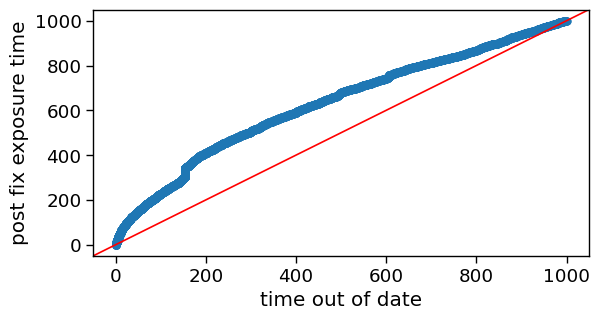

In [44]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-1000.png")

df_tood_ = pd.DataFrame(s2[s2.avg_out_of_date_duration <= 1000]['avg_out_of_date_duration'].sort_values())
df_pfet_ = pd.DataFrame(s2[s2.avg_post_fix_exposure_time <= 1000]['avg_post_fix_exposure_time'].sort_values())

print(df_tood_.shape)
print(df_pfet_.shape)

# df_tood_ = remove_outlier(df_tood_)
# df_pfet_ = remove_outlier(df_pfet_)

print(df_tood_.shape)
print(df_pfet_.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                      np.ndarray.flatten(df_pfet_.to_numpy())))

print (stats.epps_singleton_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                                  np.ndarray.flatten(df_pfet_.to_numpy())))

print (stats.anderson_ksamp([np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy())]))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_)
pp2 = sm.ProbPlot(df_pfet_)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 4500])
# h.axes[0].set_ylim([0, 4500])

# Display the plot
plt.xlabel('time out of date')
plt.ylabel('post fix exposure time')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

(18747, 1)
(20440, 1)
(16872, 1)
(18398, 1)
KstestResult(statistic=0.2621127773232407, pvalue=0.0, statistic_location=184.0, statistic_sign=-1)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


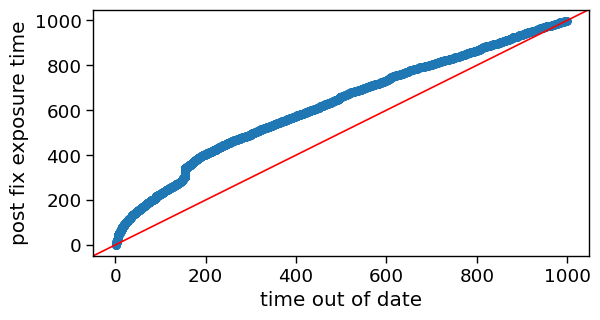

In [45]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-100-rand.png")

df_tood_ = pd.DataFrame(s2[s2.avg_out_of_date_duration <= 1000]['avg_out_of_date_duration'].sort_values())
df_pfet_ = pd.DataFrame(s2[s2.avg_post_fix_exposure_time <= 1000]['avg_post_fix_exposure_time'].sort_values())

print(df_tood_.shape)
print(df_pfet_.shape)

df_tood_ = remove_outlier(df_tood_)
df_pfet_ = remove_outlier(df_pfet_)

print(df_tood_.shape)
print(df_pfet_.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                      np.ndarray.flatten(df_pfet_.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_)
pp2 = sm.ProbPlot(df_pfet_)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 4500])
# h.axes[0].set_ylim([0, 4500])

# Display the plot
plt.xlabel('time out of date')
plt.ylabel('post fix exposure time')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

(18747, 1)
(18747, 1)
avg_post_fix_exposure_time    2953.0
dtype: float64
(16872, 1)
(16872, 1)
KstestResult(statistic=0.26997392128971076, pvalue=0.0, statistic_location=183.0, statistic_sign=-1)
Epps_Singleton_2sampResult(statistic=4524.595248950541, pvalue=0.0)
Anderson_ksampResult(statistic=1677.430726179105, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), pvalue=0.001)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/tmp/ipykernel_2801/4032469132.py:25: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  print (stats.anderson_ksamp([np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy())]))


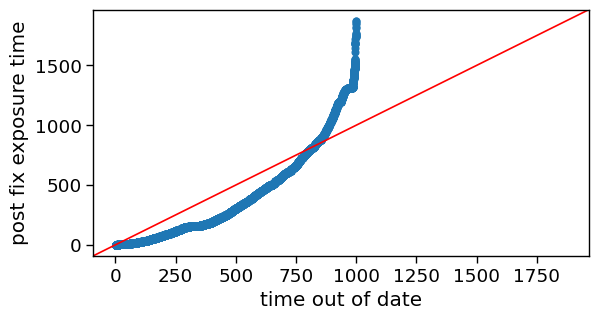

In [46]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-2000-avg-only.png")

df_tood_ = pd.DataFrame(s2[s2.avg_out_of_date_duration <= 1000]['avg_out_of_date_duration'].sort_values())
df_pfet_ = pd.DataFrame(s2[s2.avg_out_of_date_duration <= 1000]['avg_post_fix_exposure_time'].sort_values())

print(df_tood_.shape)
print(df_pfet_.shape)

print (df_pfet_.max())

df_tood_ = remove_outlier(df_tood_)
df_pfet_ = remove_outlier(df_pfet_)

print(df_tood_.shape)
print(df_pfet_.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                      np.ndarray.flatten(df_pfet_.to_numpy())))

print (stats.epps_singleton_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                                  np.ndarray.flatten(df_pfet_.to_numpy())))

print (stats.anderson_ksamp([np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy())]))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_)
pp2 = sm.ProbPlot(df_pfet_)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 4500])
# h.axes[0].set_ylim([0, 4500])

# Display the plot
plt.xlabel('time out of date')
plt.ylabel('post fix exposure time')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

### ratio

(22115, 1)
(22419, 1)
(19903, 1)
(20177, 1)
KstestResult(statistic=0.3324561104057758, pvalue=0.0, statistic_location=0.2666051660516605, statistic_sign=-1)


/home/nanin/Documents/ncstate/update-metrics/.venv/lib/python3.12/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


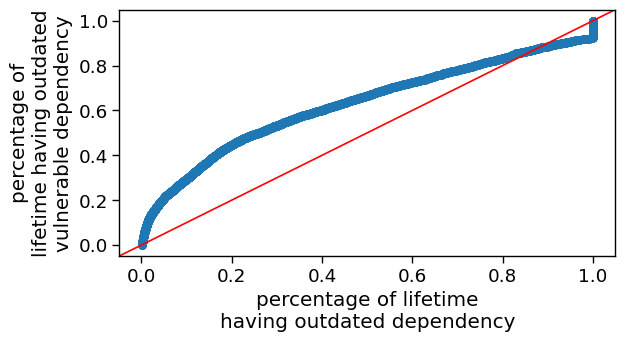

In [47]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-ratio-2000.png")

df_tood_ratio = pd.DataFrame(s2[s2.avg_out_of_date_duration <= 2000]['avg_ratio_mttu'].sort_values())
df_pfet_ratio = pd.DataFrame(s2[s2.avg_post_fix_exposure_time <= 2000]['avg_ratio_mttr'].sort_values())

print(df_tood_ratio.shape)
print(df_pfet_ratio.shape)

df_tood_ratio = remove_outlier(df_tood_ratio)
df_pfet_ratio = remove_outlier(df_pfet_ratio)

print(df_tood_ratio.shape)
print(df_pfet_ratio.shape)

print (stats.ks_2samp(np.ndarray.flatten(df_tood_ratio.to_numpy()),
                      np.ndarray.flatten(df_pfet_ratio.to_numpy())))

# Create probability plots for both dataframes
pp1 = sm.ProbPlot(df_tood_ratio)
pp2 = sm.ProbPlot(df_pfet_ratio)

# Generate QQ plot for both dataframes
h = sm.qqplot_2samples(pp1, pp2, line='45', ax=ax)

# h.axes[0].set_xlim([0, 3500])
# h.axes[0].set_ylim([0, 3500])

# Display the plot
plt.xlabel('percentage of lifetime\nhaving outdated dependency')
plt.ylabel('percentage of\nlifetime having outdated\nvulnerable dependency')
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

In [48]:
s2[s2.avg_out_of_date_duration > s2.avg_post_fix_exposure_time]

,system_name,from_package_name,avg_out_of_date_duration,avg_ratio_mttu,avg_post_fix_exposure_time,avg_ratio_mttr
0,CARGO,ahrs,623.333333,0.518868,247.000000,0.299031
2,CARGO,almel,1237.000000,0.735434,9.000000,0.005351
3,CARGO,amp,1495.000000,0.913256,375.000000,0.229078
4,CARGO,broot,1031.000000,0.656270,563.000000,0.358370
5,CARGO,cargo-benchcmp,1059.000000,0.368861,50.000000,0.017416
...,...,...,...,...,...,...
22508,PYPI,zqpy,483.350000,0.441698,454.250000,0.397419
22509,PYPI,zsl,645.142857,0.579123,348.000000,0.292806
22510,PYPI,zucchini,1982.166667,0.896367,709.333333,0.298583
22511,PYPI,zuul,144.061224,0.103920,20.000000,0.011628


## CDF plots

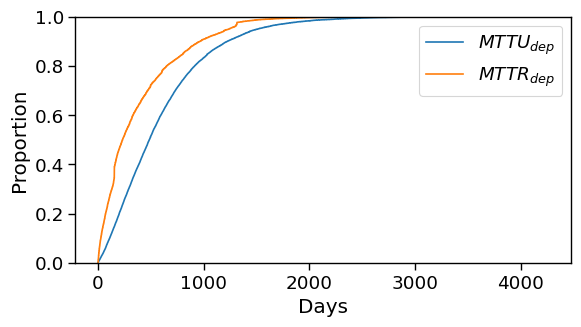

In [49]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu_vs_mttr"), "mttu_vs_mttr_cdf.pdf")

sns.ecdfplot(data=s2, x='avg_out_of_date_duration', ax=ax, label='$MTTU_{dep}$')
sns.ecdfplot(data=s2, x='avg_post_fix_exposure_time', ax=ax, label='$MTTR_{dep}$')

# Display the plot
#plt.xlabel('time out of date')
plt.xlabel('Days')
plt.legend()
# plt.show()
plt.savefig(data_file, bbox_inches='tight')

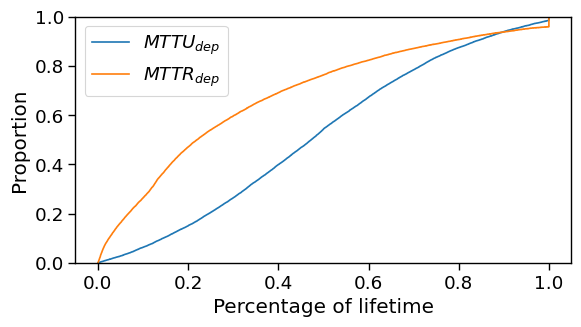

In [50]:
fig, ax = plt.subplots(figsize=(6.4, 3.2))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "tood-vs-pfet"), "tood-vs-pfet-ratio-cdf.png")

sns.ecdfplot(data=s2, x='avg_ratio_mttu', ax=ax, label='$MTTU_{dep}$')
sns.ecdfplot(data=s2, x='avg_ratio_mttr', ax=ax, label='$MTTR_{dep}$')

# Display the plot
#plt.xlabel('time out of date')
plt.xlabel('Percentage of lifetime')
plt.legend()
# plt.show()
plt.savefig(data_file, dpi=300, bbox_inches='tight')

# ecosystem stats

In [51]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "data-statistics"), "system_year_pkgrelcnt.csv")
print (data_file)
df_system = pd.read_csv(data_file,
                header=0,
                sep=',',
                on_bad_lines='skip',
                usecols=['system_name', 'year_', 'count'],
                )
rows = df_system.shape[0]
print (df_system.shape)
display(df_system.head())

/home/nanin/Documents/ncstate/update-metrics/code/visualize-data/../../data/data-statistics/system_year_pkgrelcnt.csv


FileNotFoundError: [Errno 2] No such file or directory: '/home/nanin/Documents/ncstate/update-metrics/code/visualize-data/../../data/data-statistics/system_year_pkgrelcnt.csv'

In [ ]:
df_system.drop(df_system[df_system.year_ > 2022].index, inplace=True)

NameError: name 'df_system' is not defined

NameError: name 'df_system' is not defined

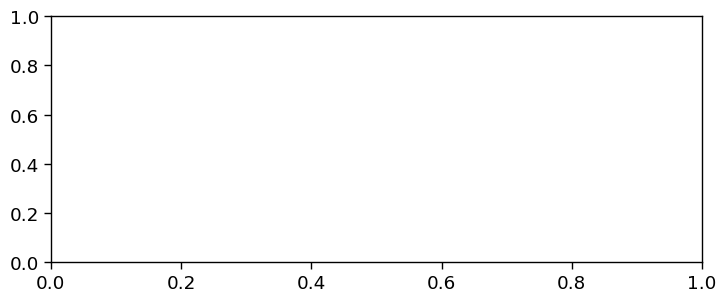

In [ ]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "data-statistics"), "system_year_pkgcnt.png")

fig, ax = plt.subplots(figsize=(8.4, 3.2))
ax = sns.barplot(data=df_system, x='year_', y='count', hue='system_name',
                    hue_order=['CARGO', 'NPM', 'PYPI'], palette='rainbow')

ax.set_xlabel('Year')
ax.set_ylabel('Released packages')
ax.set_yscale('log')
plt.xticks(rotation=45, ha='right')
# plt.title('Time out of date (maintained)\n')
plt.savefig(data_file, bbox_inches='tight')

## Statistical Tests

In [ ]:
# Extract the data
avg_out_of_date_duration = s2['avg_out_of_date_duration'].dropna().to_numpy()
avg_post_fix_exposure_time = s2['avg_post_fix_exposure_time'].dropna().to_numpy()
avg_ratio_mttu = s2['avg_ratio_mttu'].dropna().to_numpy()
avg_ratio_mttr = s2['avg_ratio_mttr'].dropna().to_numpy()

# # Unpaired two-sample t-test
# _, p_greater = stats.ttest_ind(avg_out_of_date_duration + bound, avg_post_fix_exposure_time, alternative='greater')
# _, p_less = stats.ttest_ind(avg_out_of_date_duration - bound, avg_post_fix_exposure_time, alternative='less')
# # Choose the maximum p-value
# pval = max(p_less, p_greater)

# print(f"P-value: {pval}")

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(avg_out_of_date_duration, avg_post_fix_exposure_time)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

t_stat, p_value = stats.ttest_rel(avg_out_of_date_duration, avg_post_fix_exposure_time)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 51.024908708072
P-value: 0.0
T-statistic: 71.16565021857318
P-value: 0.0


In [ ]:
from scipy.stats import ranksums, mannwhitneyu

def tost_mult(x, y, r, transform=None, type="mannwhitneyu"):
    '''
    Returns
    -------
    pvalue : float
        pvalue of the non-equivalence test
    t1, pv1 : tuple of floats
        test statistic and pvalue for lower threshold test
    t2, pv2 : tuple of floats
        test statistic and pvalue for upper threshold test
    Notes
    -----
    tested on only one example
    uses stats.ttest_1samp which doesn't have a real one-sided option
    '''
    if transform:
        y = transform(y)
        x = transform(x)
    if type=="mannwhitneyu":
        u1, pv1 = mannwhitneyu(x*r,y)
        u2, pv2 = mannwhitneyu(y,x/r)
    else: #ranksums
        u1, pv1 = ranksums(x*r,y)
        u2, pv2 = ranksums(y,x/r)
    return max(pv1, pv2), (u1, pv1), (u2, pv2)

def tost_add(x, y, d, transform=None):
    if transform:
        y = transform(y)
        x = transform(x)

    u1, pv1 = mannwhitneyu(x-d,y, method="exact")
    u2, pv2 = mannwhitneyu(y,x+d, method="exact")
    return max(pv1, pv2), (u1, pv1), (u2, pv2)

In [ ]:
tost_mult(avg_out_of_date_duration, avg_post_fix_exposure_time, 0.8, transform=np.asarray, type="mannwhitneyu")

(0.0, (307023005.0, 0.0), (144616886.5, 0.0))

In [ ]:
tost_mult(avg_ratio_mttu, avg_ratio_mttr, 0.8, transform=np.asarray, type="mannwhitneyu")

(0.0, (317176246.5, 0.0), (122966345.5, 0.0))

In [ ]:
tost_mult(s2[ s2.system_name == 'CARGO']['avg_out_of_date_duration'].dropna().to_numpy(),
            s2[ s2.system_name == 'CARGO']['avg_post_fix_exposure_time'].dropna().to_numpy(), 0.8, transform=np.asarray, type="mannwhitneyu")

(2.56505644969803e-10,
 (6516.5, 2.56505644969803e-10),
 (1360.5, 1.894762805244372e-15))

In [ ]:
tost_mult(s2[ s2.system_name == 'NPM']['avg_out_of_date_duration'].dropna().to_numpy(),
            s2[ s2.system_name == 'NPM']['avg_post_fix_exposure_time'].dropna().to_numpy(), 0.8, transform=np.asarray, type="mannwhitneyu")

(0.0, (186934188.0, 0.0), (77481819.5, 0.0))

In [ ]:
tost_mult(s2[ s2.system_name == 'PYPI']['avg_out_of_date_duration'].dropna().to_numpy(),
            s2[ s2.system_name == 'PYPI']['avg_post_fix_exposure_time'].dropna().to_numpy(), 0.8, transform=np.asarray, type="mannwhitneyu")

(0.018754392041226517,
 (13657954.0, 0.018754392041226517),
 (10029639.0, 7.545192699778795e-104))

In [ ]:
tost_mult(s2[ s2.system_name == 'CARGO']['avg_ratio_mttu'].dropna().to_numpy(),
            s2[ s2.system_name == 'CARGO']['avg_ratio_mttr'].dropna().to_numpy(), 0.8, transform=np.asarray, type="mannwhitneyu")

(7.0874820113616605e-12,
 (6709.0, 7.0874820113616605e-12),
 (1053.0, 1.3769778088852891e-18))

In [ ]:
tost_mult(s2[ s2.system_name == 'NPM']['avg_ratio_mttu'].dropna().to_numpy(),
            s2[ s2.system_name == 'NPM']['avg_ratio_mttr'].dropna().to_numpy(), 0.8, transform=np.asarray, type="mannwhitneyu")

(0.0, (195685357.5, 0.0), (62165900.0, 0.0))

In [ ]:
tost_mult(s2[ s2.system_name == 'PYPI']['avg_ratio_mttu'].dropna().to_numpy(),
            s2[ s2.system_name == 'PYPI']['avg_ratio_mttr'].dropna().to_numpy(), 0.8, transform=np.asarray, type="mannwhitneyu")

(0.01836108970714036,
 (13659142.5, 0.01836108970714036),
 (9667305.5, 1.1702227267989262e-127))

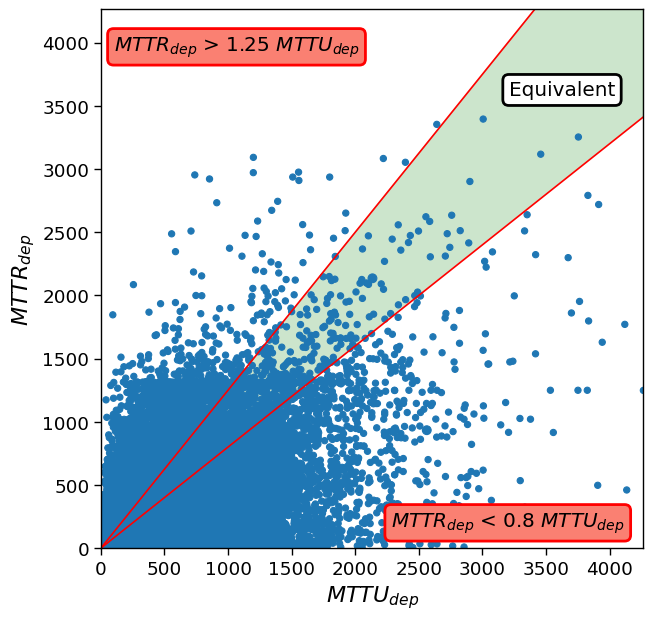

In [60]:

def plot_bubble(x, y, x_label, y_label, file_name=None):
        u, c = np.unique(np.c_[x,y], return_counts=True, axis=0)

        fig, ax = plt.subplots(figsize=(7,7))

        ax.text(0.25*max(x),0.93*max(x), "{} > 1.25 {}".format(y_label, x_label),
                ha="center", va="center",
                bbox=dict(boxstyle="round",
                        fc="salmon", ec="red", lw=2))
        ax.text(0.75*max(x), 200, "{} < 0.8 {}".format(y_label, x_label),
                ha="center", va="center",
                bbox=dict(boxstyle="round",
                        fc="salmon", ec="red", lw=2))
        ax.text(max(x)*0.85, max(x)*0.85, "Equivalent",
                ha="center", va="center",
                bbox=dict(boxstyle="round",
                        fc="white", ec="black", lw=2))
        plt.fill_between(np.arange(0,max(x)), 0, np.arange(0,max(x))/0.8, alpha=0.2, color="green")
        plt.fill_between(np.arange(0,max(x)), 0, np.arange(0,max(x))*0.8, alpha=1, color="white")
        ax.plot(np.arange(0,max(x)), np.arange(0,max(x))/0.8, color="red")
        ax.plot(np.arange(0,max(x)), 0.8*np.arange(0,max(x)), color="red")
        ax.set_xlim([-0.05,max(x)])
        ax.set_ylim([-0.05,max(x)])
        ax.scatter(u[:,0],u[:,1],s=c*20)
        ax.set_xlabel(x_label, fontsize=16)
        ax.set_ylabel(y_label, fontsize=16)

        if file_name is not None:
                data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttu_vs_mttr"), file_name)
                plt.savefig(data_file, dpi=300, bbox_inches='tight')
        plt.show()

plot_bubble(avg_out_of_date_duration,avg_post_fix_exposure_time,"${MTTU}_{dep}$", "${MTTR}_{dep}$", "mttu_vs_mttr_TOST.pdf")

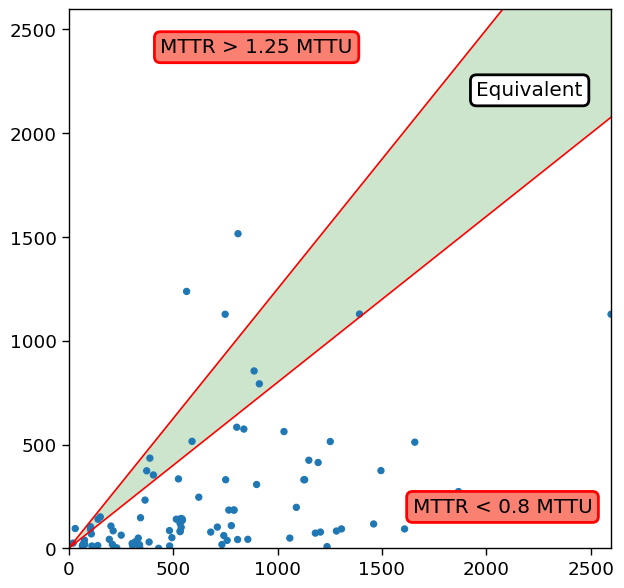

In [138]:
plot_bubble(s2[ s2.system_name == 'CARGO']['avg_out_of_date_duration'].dropna().to_numpy(),
            s2[ s2.system_name == 'CARGO']['avg_post_fix_exposure_time'].dropna().to_numpy(),"MTTU", "MTTR")

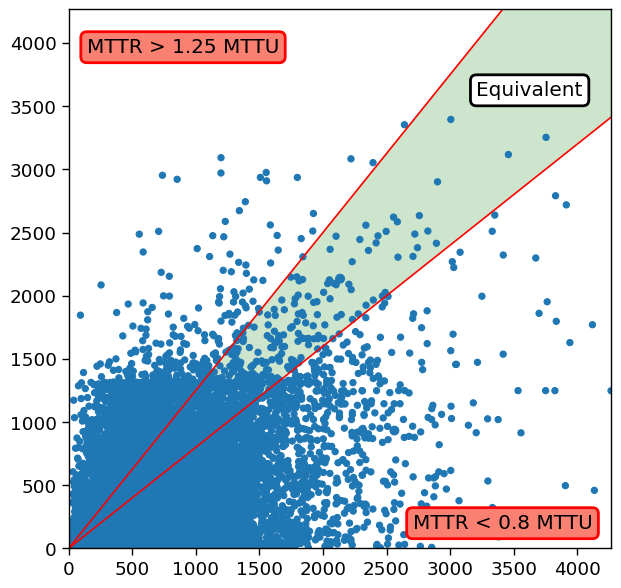

In [139]:
plot_bubble(s2[ s2.system_name == 'NPM']['avg_out_of_date_duration'].dropna().to_numpy(),
            s2[ s2.system_name == 'NPM']['avg_post_fix_exposure_time'].dropna().to_numpy(),"MTTU", "MTTR")

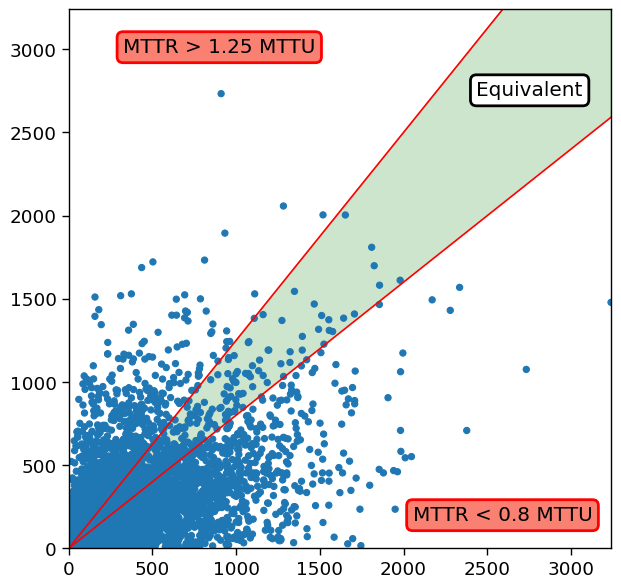

In [141]:
plot_bubble(s2[ s2.system_name == 'PYPI']['avg_out_of_date_duration'].dropna().to_numpy(),
            s2[ s2.system_name == 'PYPI']['avg_post_fix_exposure_time'].dropna().to_numpy(),"MTTU", "MTTR")

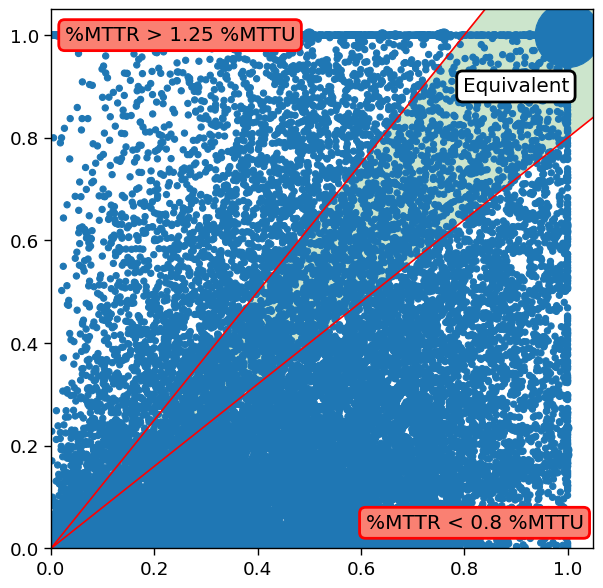

In [120]:
fig, ax = plt.subplots(figsize=(7,7))

u, c = np.unique(np.c_[avg_ratio_mttu,avg_ratio_mttr], return_counts=True, axis=0)


ax.text(0.25, 1, "%MTTR > 1.25 %MTTU",
            ha="center", va="center",
            bbox=dict(boxstyle="round",
                    fc="salmon", ec="red", lw=2))
ax.text(0.82, 0.05, "%MTTR < 0.8 %MTTU",
            ha="center", va="center",
            bbox=dict(boxstyle="round",
                    fc="salmon", ec="red", lw=2))
ax.text(0.9, 0.9, "Equivalent",
            ha="center", va="center",
            bbox=dict(boxstyle="round",
                    fc="white", ec="black", lw=2))
plt.fill_between(np.arange(0,2,0.2), 0, np.arange(0,2,0.2)/0.8, alpha=0.2, color="green")
plt.fill_between(np.arange(0,2,0.2), 0, np.arange(0,2,0.2)*0.8, alpha=1, color="white")
ax.plot(np.arange(0,2,0.2), np.arange(0,2,0.2)/0.8, color="red")
ax.plot(np.arange(0,2,0.2), 0.8*np.arange(0,2,0.2), color="red")
ax.set_xlim([0,1.05])
ax.set_ylim([0,1.05])
ax.scatter(u[:,0],u[:,1],s=c*20)
plt.show()

In [61]:
df_stat = pd.DataFrame(columns=['max tood', 'sample size', 'ks', 'epps', 'anderson', 'mannwhitney', 'cramervonmises', 'tost_ind', 'tost_rel'])

MAX_LOOP_CNT = 1000
for MAX_TOOD in [50, 100, 200, 500, 650, 800]:
    for sample_size in [10, 50, 100, 200, 500, 1000]:
        print ("MAX_TOOD:" + str(MAX_TOOD) + " sample_size:" + str(sample_size))
        
        # print(df_tood_.shape)
        # print(df_pfet_.shape)

        ks_pval = 0.0
        epps_pval = 0.0
        anderson_pval = 0.0
        mannwhitney_pval = 0.0
        cramervonmises_pval = 0.0
        tost_ind_pval = 0.0
        tost_rel_pval = 0.0

        for loop_cnt in range(0, MAX_LOOP_CNT):

            print ("loop_cnt:" + str(loop_cnt) + " MAX_TOOD:" + str(MAX_TOOD) + " sample_size:" + str(sample_size))

            df_tood_ = pd.DataFrame(s2[s2.avg_out_of_date_duration <= MAX_TOOD]['avg_out_of_date_duration'].sort_values()).sample(n=sample_size, random_state=loop_cnt)
            df_pfet_ = pd.DataFrame(s2[s2.avg_out_of_date_duration <= MAX_TOOD]['avg_post_fix_exposure_time'].sort_values()).sample(n=sample_size, random_state=loop_cnt)
            
            ks = stats.ks_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                                np.ndarray.flatten(df_pfet_.to_numpy()))
            # Do we need other things? ks.statistic, statistic_loc, sign?
            print (ks)
            ks_pval += ks.pvalue

            epps_singleton = stats.epps_singleton_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                                            np.ndarray.flatten(df_pfet_.to_numpy()))
            # print (epps_singleton)
            epps_pval += epps_singleton.pvalue

            anderson = stats.anderson_ksamp([np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy())])
            # print (anderson)
            anderson_pval += anderson.pvalue

            mannwhitney = stats.mannwhitneyu(np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy()))
            # print (mannwhitney)
            mannwhitney_pval += mannwhitney.pvalue

            cramervonmises = stats.cramervonmises_2samp(np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy()))
            # print (cramervonmises)
            cramervonmises_pval += cramervonmises.pvalue

            tost_ind = stats.ttest_ind(np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy()))
            # print (tost_ind)
            tost_ind_pval += tost_ind.pvalue

            tost_rel = stats.ttest_rel(np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy()))
            # print (tost_rel)
            tost_rel_pval += tost_rel.pvalue
        
        ks_pval /= MAX_LOOP_CNT
        epps_pval /= MAX_LOOP_CNT
        anderson_pval /= MAX_LOOP_CNT
        mannwhitney_pval /= MAX_LOOP_CNT
        cramervonmises_pval /= MAX_LOOP_CNT
        tost_ind_pval /= MAX_LOOP_CNT

        df_temp = pd.DataFrame({'max tood': MAX_TOOD, 'sample size': sample_size, 'ks': ks_pval, 'epps': epps_pval, 'anderson': anderson_pval, 'mannwhitney': mannwhitney_pval, 'cramervonmises': cramervonmises_pval, 'tost_ind': tost_ind_pval, 'tost_rel': tost_rel_pval}, index=[0])
        df_stat = pd.concat([df_stat, df_temp], axis=0, ignore_index=True)

df_stat.sort_values(by=['max tood', 'sample size'], inplace=True)
df_stat.reset_index(inplace=True, drop=True)
df_stat

MAX_TOOD:50 sample_size:10
loop_cnt:0 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.5, pvalue=0.16782134274394334, statistic_location=45.42857142857143, statistic_sign=1)
loop_cnt:1 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.3, pvalue=0.7869297884777761, statistic_location=25.333333333333332, statistic_sign=1)
loop_cnt:2 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.6, pvalue=0.05244755244755244, statistic_location=47.41935483870968, statistic_sign=1)
loop_cnt:3 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.7, pvalue=0.012340600575894691, statistic_location=47.588235294117645, statistic_sign=1)
loop_cnt:4 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.4, pvalue=0.41752365281777043, statistic_location=45.8695652173913, statistic_sign=1)
loop_cnt:5 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.5, pvalue=0.16782134274394334, statistic_location=35.0, statistic_sign=1)
loop_cnt:6 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.4, pvalue=0.4175236528

/tmp/ipykernel_9863/3836305286.py:37: UserWarning: p-value capped: true value larger than 0.25. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  anderson = stats.anderson_ksamp([np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy())])


loop_cnt:12 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.7, pvalue=0.012340600575894691, statistic_location=46.375, statistic_sign=1)
loop_cnt:13 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.5, pvalue=0.16782134274394334, statistic_location=35.5, statistic_sign=1)
loop_cnt:14 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.6, pvalue=0.05244755244755244, statistic_location=45.6, statistic_sign=1)
loop_cnt:15 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.4, pvalue=0.41752365281777043, statistic_location=43.42857142857143, statistic_sign=1)
loop_cnt:16 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.6, pvalue=0.05244755244755244, statistic_location=41.666666666666664, statistic_sign=1)
loop_cnt:17 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.7, pvalue=0.012340600575894691, statistic_location=47.5, statistic_sign=1)
loop_cnt:18 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.3, pvalue=0.7869297884777761, statistic_location=42.58974358974359, statistic

/tmp/ipykernel_9863/3836305286.py:37: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  anderson = stats.anderson_ksamp([np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy())])


loop_cnt:53 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.4, pvalue=0.41752365281777043, statistic_location=46.375, statistic_sign=1)
loop_cnt:54 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.6, pvalue=0.05244755244755244, statistic_location=39.25, statistic_sign=1)
loop_cnt:55 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.2, pvalue=0.9944575548290717, statistic_location=24.2, statistic_sign=1)
loop_cnt:56 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.5, pvalue=0.16782134274394334, statistic_location=40.79411764705882, statistic_sign=1)
loop_cnt:57 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.4, pvalue=0.41752365281777043, statistic_location=48.15384615384615, statistic_sign=1)
loop_cnt:58 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.4, pvalue=0.41752365281777043, statistic_location=29.0, statistic_sign=1)
loop_cnt:59 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.4, pvalue=0.41752365281777043, statistic_location=44.0, statistic_sign=1)
loop_c

/tmp/ipykernel_9863/3836305286.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_stat = pd.concat([df_stat, df_temp], axis=0, ignore_index=True)


MAX_TOOD:50 sample_size:50
loop_cnt:0 MAX_TOOD:50 sample_size:50
KstestResult(statistic=0.54, pvalue=4.929118631187453e-07, statistic_location=49.785714285714285, statistic_sign=1)
loop_cnt:1 MAX_TOOD:50 sample_size:50
KstestResult(statistic=0.34, pvalue=0.005841778142694731, statistic_location=49.21052631578947, statistic_sign=1)
loop_cnt:2 MAX_TOOD:50 sample_size:50
KstestResult(statistic=0.56, pvalue=1.4534580579142488e-07, statistic_location=48.666666666666664, statistic_sign=1)
loop_cnt:3 MAX_TOOD:50 sample_size:50
KstestResult(statistic=0.44, pvalue=9.909301386655972e-05, statistic_location=48.4, statistic_sign=1)
loop_cnt:4 MAX_TOOD:50 sample_size:50
KstestResult(statistic=0.4, pvalue=0.0005822568814776493, statistic_location=47.65, statistic_sign=1)
loop_cnt:5 MAX_TOOD:50 sample_size:50
KstestResult(statistic=0.5, pvalue=4.8075337049514946e-06, statistic_location=49.25, statistic_sign=1)
loop_cnt:6 MAX_TOOD:50 sample_size:50
KstestResult(statistic=0.44, pvalue=9.909301386655972

KeyboardInterrupt: 

In [28]:
print(df_stat.to_latex(columns=['max tood', 'sample size', 'ks', 'epps', 'anderson', 'mannwhitney', 'cramervonmises', 'tost_ind'], float_format="%.3f", bold_rows=False, index=False, label="tab:stat-tests", caption="p-values of statistical tests."))

\begin{table}
\caption{p-values of statistical tests.}
\label{tab:stat-tests}
\begin{tabular}{llrrrrrr}
\toprule
max tood & sample size & ks & epps & anderson & mannwhitney & cramervonmises & tost_ind \\
\midrule
50 & 10 & 0.273 & 0.314 & 0.140 & 0.305 & 0.241 & 0.121 \\
50 & 50 & 0.001 & 0.000 & 0.002 & 0.018 & 0.003 & 0.001 \\
50 & 100 & 0.000 & 0.000 & 0.001 & 0.001 & 0.000 & 0.000 \\
50 & 200 & 0.000 & 0.000 & 0.001 & 0.000 & 0.000 & 0.000 \\
50 & 500 & 0.000 & 0.000 & 0.001 & 0.000 & 0.000 & 0.000 \\
100 & 10 & 0.397 & 0.361 & 0.175 & 0.460 & 0.323 & 0.185 \\
100 & 50 & 0.009 & 0.000 & 0.007 & 0.113 & 0.018 & 0.003 \\
100 & 100 & 0.000 & 0.000 & 0.001 & 0.027 & 0.001 & 0.000 \\
100 & 200 & 0.000 & 0.000 & 0.001 & 0.002 & 0.000 & 0.000 \\
100 & 500 & 0.000 & 0.000 & 0.001 & 0.000 & 0.000 & 0.000 \\
200 & 10 & 0.609 & 0.477 & 0.226 & 0.690 & 0.509 & 0.414 \\
200 & 50 & 0.087 & 0.003 & 0.041 & 0.587 & 0.104 & 0.053 \\
200 & 100 & 0.007 & 0.000 & 0.003 & 0.469 & 0.019 & 0.005 \\
200 &

In [38]:
df_stat = pd.DataFrame(columns=['max tood', 'sample size', 'ks', 'epps', 'anderson', 'mannwhitney', 'cramervonmises', 'tost_ind', 'tost_rel'])

MAX_LOOP_CNT = 1000
for MAX_TOOD in [50, 100, 200, 500, 650, 800]:
    for sample_size in [10, 50, 100, 200, 500, 1000]:
        print ("MAX_TOOD:" + str(MAX_TOOD) + " sample_size:" + str(sample_size))
        
        # print(df_tood_.shape)
        # print(df_pfet_.shape)

        ks_pval = 0.0
        epps_pval = 0.0
        anderson_pval = 0.0
        mannwhitney_pval = 0.0
        cramervonmises_pval = 0.0
        tost_ind_pval = 0.0
        tost_rel_pval = 0.0

        for loop_cnt in range(0, MAX_LOOP_CNT):

            print ("loop_cnt:" + str(loop_cnt) + " MAX_TOOD:" + str(MAX_TOOD) + " sample_size:" + str(sample_size))

            df_tood_ = pd.DataFrame(s1[s1.avg_out_of_date_duration <= MAX_TOOD]['avg_out_of_date_duration'].dropna().sort_values()).sample(n=sample_size, random_state=loop_cnt)
            df_pfet_ = pd.DataFrame(s1[s1.avg_out_of_date_duration <= MAX_TOOD]['avg_post_fix_exposure_time'].dropna().sort_values()).sample(n=sample_size, random_state=loop_cnt)
            
            ks = stats.ks_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                                np.ndarray.flatten(df_pfet_.to_numpy()))
            # Do we need other things? ks.statistic, statistic_loc, sign?
            print (ks)
            ks_pval += ks.pvalue

            epps_singleton = stats.epps_singleton_2samp(np.ndarray.flatten(df_tood_.to_numpy()),
                                            np.ndarray.flatten(df_pfet_.to_numpy()))
            # print (epps_singleton)
            epps_pval += epps_singleton.pvalue

            anderson = stats.anderson_ksamp([np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy())])
            # print (anderson)
            anderson_pval += anderson.pvalue

            mannwhitney = stats.mannwhitneyu(np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy()))
            # print (mannwhitney)
            mannwhitney_pval += mannwhitney.pvalue

            cramervonmises = stats.cramervonmises_2samp(np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy()))
            # print (cramervonmises)
            cramervonmises_pval += cramervonmises.pvalue

            tost_ind = stats.ttest_ind(np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy()))
            # print (tost_ind)
            tost_ind_pval += tost_ind.pvalue

            tost_rel = stats.ttest_rel(np.ndarray.flatten(df_tood_.to_numpy()), np.ndarray.flatten(df_pfet_.to_numpy()))
            # print (tost_rel)
            tost_rel_pval += tost_rel.pvalue
        
        ks_pval /= MAX_LOOP_CNT
        epps_pval /= MAX_LOOP_CNT
        anderson_pval /= MAX_LOOP_CNT
        mannwhitney_pval /= MAX_LOOP_CNT
        cramervonmises_pval /= MAX_LOOP_CNT
        tost_ind_pval /= MAX_LOOP_CNT

        df_temp = pd.DataFrame({'max tood': MAX_TOOD, 'sample size': sample_size, 'ks': ks_pval, 'epps': epps_pval, 'anderson': anderson_pval, 'mannwhitney': mannwhitney_pval, 'cramervonmises': cramervonmises_pval, 'tost_ind': tost_ind_pval, 'tost_rel': tost_rel_pval}, index=[0])
        df_stat = pd.concat([df_stat, df_temp], axis=0, ignore_index=True)

df_stat.sort_values(by=['max tood', 'sample size'], inplace=True)
df_stat.reset_index(inplace=True, drop=True)
df_stat

MAX_TOOD:50 sample_size:10
loop_cnt:0 MAX_TOOD:50 sample_size:10
KstestResult(statistic=0.0, pvalue=1.0, statistic_location=0.0, statistic_sign=1)


/home/imranur/security-metrics/secmet_venv/lib/python3.12/site-packages/scipy/stats/_hypotests.py:120: RuntimeWarning: divide by zero encountered in divide
  ts = np.reshape(t, (-1, 1)) / sigma
/home/imranur/security-metrics/secmet_venv/lib/python3.12/site-packages/scipy/stats/_hypotests.py:123: RuntimeWarning: invalid value encountered in multiply
  gx = np.vstack((np.cos(ts*x), np.sin(ts*x))).T  # shape = (nx, 2*len(t))
/home/imranur/security-metrics/secmet_venv/lib/python3.12/site-packages/scipy/stats/_hypotests.py:124: RuntimeWarning: invalid value encountered in multiply
  gy = np.vstack((np.cos(ts*y), np.sin(ts*y))).T


LinAlgError: SVD did not converge

In [ ]:
print(df_stat.to_latex(columns=['max tood', 'sample size', 'ks', 'epps', 'anderson', 'mannwhitney', 'cramervonmises', 'tost_ind'], float_format="%.3f", bold_rows=False, index=False, label="tab:stat-tests", caption="p-values of statistical tests."))

In [31]:
# correlation analysis
# change sample size, change max tood, change method
df_corr = pd.DataFrame(columns=['type', 'sample size', 'spearman', 'pearson', 'kendall'])
for sample_size in [10, 50, 100, 1000, 10000, 17384]:
    print (sample_size)
    df_spearman = s2[['avg_out_of_date_duration',
                'avg_ratio_mttu',
                'avg_post_fix_exposure_time',
                'avg_ratio_mttr']].sample(n=sample_size, random_state=1).corr(method='spearman')
    # print (df_spearman['avg_out_of_date_duration']['avg_post_fix_exposure_time'])
    # print (df_spearman['avg_ratio_tood']['avg_ratio_pfet'])
    df_pearson = s2[['avg_out_of_date_duration',
                'avg_ratio_mttu',
                'avg_post_fix_exposure_time',
                'avg_ratio_mttr']].sample(n=sample_size, random_state=1).corr(method='pearson')
    # print (df_pearson['avg_out_of_date_duration']['avg_post_fix_exposure_time'])
    # print (df_pearson['avg_ratio_tood']['avg_ratio_pfet'])
    df_kendall = s2[['avg_out_of_date_duration',
                'avg_ratio_mttu',
                'avg_post_fix_exposure_time',
                'avg_ratio_mttr']].sample(n=sample_size, random_state=1).corr(method='kendall')
    # print (df_kendall['avg_out_of_date_duration']['avg_post_fix_exposure_time'])
    # print (df_kendall['avg_ratio_tood']['avg_ratio_pfet'])
    df_temp = pd.DataFrame({'type': 'tood vs pfet', 'sample size': sample_size, 'spearman': df_spearman['avg_out_of_date_duration']['avg_post_fix_exposure_time'], 'pearson': df_pearson['avg_out_of_date_duration']['avg_post_fix_exposure_time'], 'kendall': df_kendall['avg_out_of_date_duration']['avg_post_fix_exposure_time']}, index=[0])
    df_temp2 = pd.DataFrame({'type': 'rtood vs rpfet', 'sample size': sample_size, 'spearman': df_spearman['avg_ratio_mttu']['avg_ratio_mttr'], 'pearson': df_pearson['avg_ratio_mttu']['avg_ratio_mttr'], 'kendall': df_kendall['avg_ratio_mttu']['avg_ratio_mttr']}, index=[0])
    df_corr = pd.concat([df_corr, df_temp, df_temp2], axis=0, ignore_index=True)
df_corr.sort_values(by=['type', 'sample size'], inplace=True)
df_corr.reset_index(inplace=True, drop=True)
df_corr

10
50
100
1000
10000
17384


/tmp/ipykernel_188069/207686682.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_corr = pd.concat([df_corr, df_temp, df_temp2], axis=0, ignore_index=True)


,type,sample size,spearman,pearson,kendall
0,rtood vs rpfet,10,0.551205,0.611288,0.433200
1,rtood vs rpfet,50,0.281361,0.291211,0.207204
2,rtood vs rpfet,100,0.201470,0.209543,0.134137
3,rtood vs rpfet,1000,0.290873,0.281034,0.202364
4,rtood vs rpfet,10000,0.342937,0.334438,0.240945
5,rtood vs rpfet,17384,0.331872,0.323156,0.232991
6,tood vs pfet,10,0.587879,0.725022,0.422222
7,tood vs pfet,50,0.377028,0.352335,0.259553
8,tood vs pfet,100,0.296388,0.274896,0.193698
9,tood vs pfet,1000,0.405861,0.377294,0.278380


In [32]:
print(df_corr.to_latex(columns=['type', 'sample size', 'spearman', 'pearson', 'kendall'], float_format="%.3f", bold_rows=False, index=False, label="tab:correlation", caption="Correlation coefficients."))

\begin{table}
\caption{Correlation coefficients.}
\label{tab:correlation}
\begin{tabular}{llrrr}
\toprule
type & sample size & spearman & pearson & kendall \\
\midrule
rtood vs rpfet & 10 & 0.551 & 0.611 & 0.433 \\
rtood vs rpfet & 50 & 0.281 & 0.291 & 0.207 \\
rtood vs rpfet & 100 & 0.201 & 0.210 & 0.134 \\
rtood vs rpfet & 1000 & 0.291 & 0.281 & 0.202 \\
rtood vs rpfet & 10000 & 0.343 & 0.334 & 0.241 \\
rtood vs rpfet & 17384 & 0.332 & 0.323 & 0.233 \\
tood vs pfet & 10 & 0.588 & 0.725 & 0.422 \\
tood vs pfet & 50 & 0.377 & 0.352 & 0.260 \\
tood vs pfet & 100 & 0.296 & 0.275 & 0.194 \\
tood vs pfet & 1000 & 0.406 & 0.377 & 0.278 \\
tood vs pfet & 10000 & 0.435 & 0.419 & 0.302 \\
tood vs pfet & 17384 & 0.420 & 0.404 & 0.291 \\
\bottomrule
\end{tabular}
\end{table}



In [25]:
df_spearman = s2[['avg_out_of_date_duration',
                'avg_ratio_mttu',
                'avg_post_fix_exposure_time',
                'avg_ratio_mttr']].corr(method='spearman')
print (df_spearman['avg_out_of_date_duration']['avg_post_fix_exposure_time'])
print (df_spearman['avg_ratio_mttu']['avg_ratio_mttr'])
df_pearson = s2[['avg_out_of_date_duration',
            'avg_ratio_mttu',
            'avg_post_fix_exposure_time',
            'avg_ratio_mttr']].corr(method='pearson')
print (df_pearson['avg_out_of_date_duration']['avg_post_fix_exposure_time'])
print (df_pearson['avg_ratio_mttu']['avg_ratio_mttr'])
df_kendall = s2[['avg_out_of_date_duration',
            'avg_ratio_mttu',
            'avg_post_fix_exposure_time',
            'avg_ratio_mttr']].corr(method='kendall')
print (df_kendall['avg_out_of_date_duration']['avg_post_fix_exposure_time'])
print (df_kendall['avg_ratio_mttu']['avg_ratio_mttr'])

0.4837483735523361
0.3345874767265263
0.4949726269474599
0.2951240485226528
0.33775705836498515
0.22946405284463287


In [26]:
df_spearman = s1[['avg_out_of_date_duration',
                'avg_ratio_mttu',
                'avg_post_fix_exposure_time',
                'avg_ratio_mttr']].corr(method='spearman')
print (df_spearman['avg_out_of_date_duration']['avg_post_fix_exposure_time'])
print (df_spearman['avg_ratio_mttu']['avg_ratio_mttr'])
df_pearson = s1[['avg_out_of_date_duration',
            'avg_ratio_mttu',
            'avg_post_fix_exposure_time',
            'avg_ratio_mttr']].corr(method='pearson')
print (df_pearson['avg_out_of_date_duration']['avg_post_fix_exposure_time'])
print (df_pearson['avg_ratio_mttu']['avg_ratio_mttr'])
df_kendall = s1[['avg_out_of_date_duration',
            'avg_ratio_mttu',
            'avg_post_fix_exposure_time',
            'avg_ratio_mttr']].corr(method='kendall')
print (df_kendall['avg_out_of_date_duration']['avg_post_fix_exposure_time'])
print (df_kendall['avg_ratio_mttu']['avg_ratio_mttr'])

0.9784811100710451
0.9722638801100684
0.7189070959483558
0.6925344632403597
0.8824237610012882
0.863157531510818
